<a href="https://colab.research.google.com/github/MohammadAli147369/Machine-learning-projects/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/data_k_means.csv')

In [ ]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [ ]:
df.tail()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0
7049,1050855161656896_1050858841656528,photo,09-10-2016 10:30,17,0,0,17,0,0,0,0,0


In [ ]:
df.duplicated().sum()

51

In [ ]:
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [ ]:
df.dtypes

status_id           object
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

In [ ]:
df['status_id'].duplicated().sum()

53

In [ ]:
df.shape

(7050, 12)

In [ ]:
df['status_published'].nunique()

6913

In [ ]:
df.drop(columns=['status_id','status_published'],inplace=True)
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [ ]:
x = df
y = df['status_type']

In [ ]:
label_encoder = LabelEncoder()

x['status_type'] = label_encoder.fit_transform(y)
y = label_encoder.fit_transform(y)

In [ ]:
cols = x.select_dtypes(include=['int']).columns.to_list()

In [ ]:
cols

['status_type',
 'num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys']

In [ ]:
m=MinMaxScaler()

In [ ]:
x[cols] = m.fit_transform(x[cols])

In [ ]:
x

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
7045,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


In [ ]:
y

0       video
1       photo
2       video
3       photo
4       photo
        ...  
7045    photo
7046    photo
7047    photo
7048    photo
7049    photo
Name: status_type, Length: 7050, dtype: object

In [ ]:
x=pd.DataFrame(x)

In [ ]:
x

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
7045,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


In [ ]:
k_means = KMeans(n_clusters=2, random_state=0)
k_means.fit(x)

cluster_centers = k_means.cluster_centers_
inertia = k_means.inertia_
labels = k_means.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
# correctlabels=sum(y==labels)

In [ ]:
# Compute the Adjusted Rand Index
ari = adjusted_rand_score(y, labels)

In [ ]:
ari

0.9098610463127865

In [ ]:
# correctlabels

In [ ]:
y.size

7050

In [ ]:
# accuracy_score=correctlabels/y.size
# accuracy_score

Text(0.5, 1.0, 'Elbow Method')

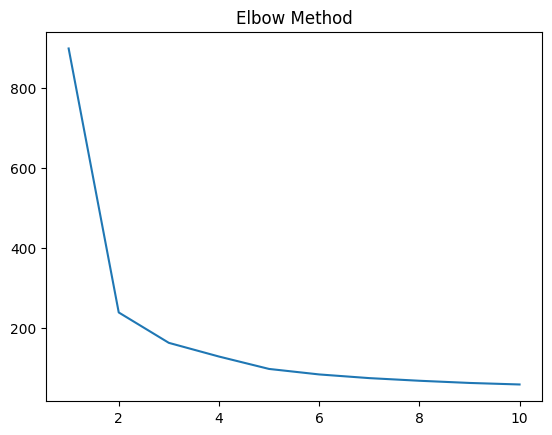

In [ ]:
cs=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10,random_state=0)
  kmeans.fit(x)
  cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.title('Elbow Method')

In [ ]:
k_means1 = KMeans(n_clusters=3, random_state=0)
k_means1.fit(x)

cluster_centers1 = k_means1.cluster_centers_
inertia1 = k_means1.inertia_
labels1 = k_means1.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels1

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
correctlabels1=sum(y==labels1)
correctlabels1

138

In [ ]:
acc=correctlabels1/y.size
acc

0.01957446808510638

In [ ]:
acc=round(acc,2)
acc

0.02

In [ ]:
ari1 = adjusted_rand_score(y, labels1)
ari1

0.850354088906488

In [ ]:
k_means2 = KMeans(n_clusters=4, random_state=0)
k_means2.fit(x)

cluster_centers2 = k_means2.cluster_centers_
inertia2 = k_means2.inertia_
labels2 = k_means2.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels2

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
correctlabels2=sum(y==labels2)
correctlabels2

414

In [ ]:
acc1=correctlabels2/y.size
acc1

0.05872340425531915

In [ ]:
acc1=round(acc1,2)
acc1

0.06

In [ ]:
k_means = KMeans(n_clusters=2, random_state=0)
k_means.fit(x)

cluster_centers = k_means.cluster_centers_
inertia = k_means.inertia_
labels = k_means.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
correctlabels=sum(y==labels)
correctlabels

4288

In [ ]:
accuracy_score=correctlabels/y.size
accuracy_score

0.6082269503546099

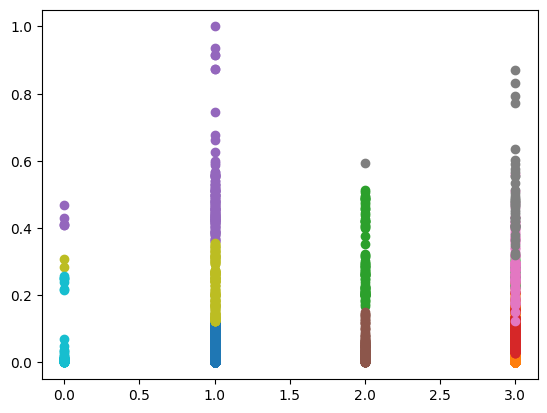

In [ ]:
plt.figure()
labels = kmeans.labels_
for cluster_label in set(labels):
    plt.scatter(x.iloc[labels == cluster_label, 0], x.iloc[labels == cluster_label, 1])
plt.show()